<a href="https://colab.research.google.com/github/damon022002/projectWeek2Mod10/blob/master/week2/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# The following includes are needed to work with graphs and display solutions.
%matplotlib inline
# Extra package need to be installed on Google Colab.
!apt install libgraphviz-dev
!pip install pygraphviz
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from IPython.display import display
import random


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



 for n: 100 	 p: a 1 nd 	 f: 5
the external contribution r is 0.6765086448598129
The T pageRank is 2.7026664982739734

 for n: 100 	 p: a 1 nd 	 f: 10
the external contribution r is 0.6463642857142856
The T pageRank is 2.835193050193049

 for n: 100 	 p: a 5 nd 	 f: 5
the external contribution r is 0.6572759009009009
The T pageRank is 2.623817060303546


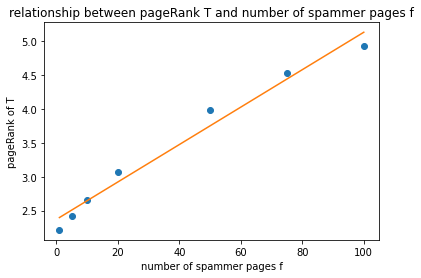

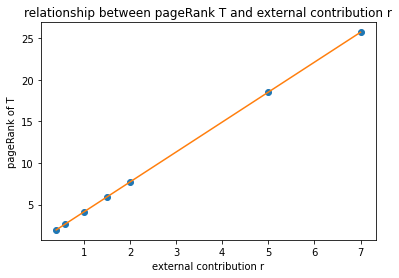

In [11]:
# book of standford uni ch5 pagerank
# ✦ Taxation Schemes: To counter the effect of spider traps (and of dead ends,
# if we do not eliminate them), PageRank is normally computed in a way
# that modifies the simple iterative multiplication by the transition matrix.
# A parameter β is chosen, typically around 0.85. Given an estimate of the
# PageRank, the next estimate is computed by multiplying the estimate by
# β times the transition matrix, and then adding (1 − β)/n to the estimate
# for each page, where n is the total number of pages.

# https://www.youtube.com/watch?v=blvMKHJFkPo
# rank of each "farm" page by using spider traps avoidance: beta * (all received pageRanks)+ (1 - beta) / totalNodes


# For each accessible page P, rP is its PageRank; you can sum them into a single variable
# n is number of inaccessable pages which links to the accessable pages
# beta is the spider trap avoidance
# p is number of accessable pages
# f is number of supporting spam pages
# r = β · sum(rP) , which r is, essentially, the external PageRank contribution towards T

# the graph is as follows:
# every inaccessable node (n nodes) is connected to every accessible node (p). which will make the page rank of one
# accessible node = n * initialRank / p;
# then every accessible node will go to target page T. and to calculate the external contribution from P to T. we use
# beta * sum(rp), because every pageRank in P is the same we can calculate it as = beta * rp * p.
# then we will calculate the pagerank his spammer with the use the use of spider traps avoidance, which will be:
# oneSpammer = beta * ( t/f) + (1-beta) / total

# finally we can calculate the pagerank of t which is: r + beta*f (oneSpammer) + (1 - beta) / N, after apply oneSpammer
# you get: t = r + (beta^2)*t + (beta(1-beta)*f) / total +
# when simplying t and ignoring the last part ((1-beta)/ total) you get:
# t = r / (1 - beta*beta) + c*f/total where c = beta/(1-beta)
def pageRank(p, f):
    n = 100  # fixed
    beta = 0.85  # fixed
    total = n + p + f + 1
    initialRank = 1 / total

    #define pageRankOneP!!!!
    #Contribution x from outside, as we have assumed.
    #with beta:
    pageRankOneP = beta*(n*initialRank/p) + (1-beta)/n
    #without beta:
    # pageRankOneP = n * initialRank / p
    r = beta * pageRankOneP * p

    # now calculate the external contribution of the spammers and T:
    t = r / (1 - beta*beta) + (beta/(1-beta))*f/total
    # oneSpammer = beta * (t / f) + (1 - beta) / total

    print("\n for n: {} \t p: a {} nd \t f: {}".format(n, p, f))
    print("the external contribution r is {}".format(r))
    print("The T pageRank is {}".format(t))
    # print("The OneSpammer PageRank is {}".format(oneSpammer))

pageRank(1, 5)

pageRank(1, 10)

pageRank(5, 5)


# if f gets bigger, than also t will also get bigger, there is an linear relationship between t and f
# same with r, if r gets bigger than t will also get bigger, linear relationship


def pageRankFixedR():
    n = 100  # fixed
    beta = 0.85  # fixed
    p = 4   #fixed
    fixedR = 0.6   #fixed
    # now calculate the external contribution of the spammers and with different f:
    listF = [1,5,10,20,50,75,100]
    #total = n + p + f + 1
    listT = [fixedR / (1 - beta*beta) + (beta/(1-beta))*f/(n + p + f + 1) for f in listF]

    
    x = np.array(listF)
    y = np.array(listT)
    plt.plot(x, y, 'o')
    
    #obtain m (slope) and b(intercept) of linear regression line
    m, b = np.polyfit(x, y, 1)
    #add linear regression line to scatterplot 
    plt.plot(x, m*x+b)
    plt.title("relationship between pageRank T and number of spammer pages f")
    plt.xlabel("number of spammer pages f")
    plt.ylabel("pageRank of T")
    plt.show()
    print("\n")

def pageRankFixedF():
    n = 100  # fixed
    beta = 0.85  # fixed
    p = 2   # fixed
    fixedF = 10 # fixed\

    # now calculate the external contribution of the spammers and with different r:
    listR = [0.4,0.6,1,1.5,2.0,5,7]
    #total = n + p + f + 1
    listT = [r / (1 - beta*beta) + (beta/(1-beta))*fixedF/(n + p + fixedF + 1) for r in listR]

    
    x = np.array(listR)
    y = np.array(listT)
    plt.plot(x, y, 'o')
    
    #obtain m (slope) and b(intercept) of linear regression line
    m, b = np.polyfit(x, y, 1)
    #add linear regression line to scatterplot 
    plt.plot(x, m*x+b)
    plt.title("relationship between pageRank T and external contribution r")
    plt.xlabel("external contribution r")
    plt.ylabel("pageRank of T")
    plt.show()
    print("\n")

pageRankFixedR()

pageRankFixedF()


#when looking at our experiments, you see that when everything is constant except
# for either f or r, then the pageRank of T will increase. 

#as mentioned before, when looking at the function of t:
# t = r / (1 - beta*beta) + c*f/total where c = beta/(1-beta)
# when everything is constant such as the beta, c and total, then both f and r have
# a positive linear relationship with t, that could also be seen in the graph.




